# Algebra Linear Computacional - Lista 6

## Mayara Aragão

### Tarefa 1)
Para a integração de equações diferenciais ordinárias, elaborei uma rotina que tem como entrada, o intervalo de tempo a ser integrado $[t_0,t_f]$, o valor inicial $x_0$ da função e o passo $h$ a ser utilizado. Além disso, tem como último parametro de entrada, a variável $metodo$ que define se o método usado será o de Euler $(1)$, Runge-Kutta 2$^a$ ordem $(2)$ ou Runge-Kutta 4$^a$ ordem $( \neq \{1,2\} ) $.


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def ode_1_ordem(t0, tf, x0, h, metodo):
    N = int((tf - t0)/h)
    X = np.zeros(N+1)
    T = np.zeros(N+1)
    X[0] = x0
    T[0] = t0
    for k in np.arange(1, N+1):
        T[k] = k*h
        if metodo == 1:
            # Método de Euler:
            K = f(T[k-1], X[k-1])
            X[k] = X[k-1] + K*h
        elif metodo == 2:
            # Método Runge-Kutta segunda ordem:
            K1 = f(T[k-1], X[k-1])
            K2 = f(T[k-1]+h, X[k-1] + h*K1)
            X[k] = X[k-1] + h*(K1+K2)/2
        else:
            # Método Runge-Kutta quarta ordem:
            K1 = f(T[k-1], X[k-1])
            K2 = f(T[k-1] + h/2, X[k-1] + (h/2)*K1)
            K3 = f(T[k-1] + h/2, X[k-1] + (h/2)*K2)
            K4 = f(T[k-1] + h, X[k-1] + h*K3)
            X[k] = X[k-1] + h*(K1 + 2*K2 + 2*K3 + K4)/6
            
    return T, X

### Exercício 1)
$$ y'(t) = -2 t \cdot y(t)^2$$
$$y(0)=1$$

Definindo a função $y'(t, y)$:

In [3]:
def f(t, y):
    return -2*t*y**2

Definindo $y(t) = \frac{1}{1+t^2}$ para cálculo de solução exata

In [4]:
def g(t): 
    return 1/(1+t**2)

Utilizando inicialmente um passo de $h=0.5$:

In [5]:
t1, x1 = ode_1_ordem(0, 10, 1, 0.5, 1)
t2, x2 = ode_1_ordem(0, 10, 1, 0.5, 2)
t3, x3 = ode_1_ordem(0, 10, 1, 0.5, 3)

In [6]:
N = np.size(t1)
print(" t[N]     euler        rk2           rk4         y(t)\n")
for i in np.arange(N): 
    tempo = t1[i]
    aux = x1[i]
    aux1 = x2[i]
    aux3 = x3[i]
    s = g(tempo)
    print(' {:>2.1f} '.format(t1[i]), '  {:>8,.5f}  '.format(aux), '  {:>8,.5f}  '.format(aux1),
          '  {:>8,.5f}  '.format(aux3), '  {:>8,.5f}  '.format(s))

 t[N]     euler        rk2           rk4         y(t)

 0.0     1.00000      1.00000      1.00000      1.00000  
 0.5     1.00000      0.75000      0.79838      0.80000  
 1.0     0.50000      0.49951      0.49970      0.50000  
 1.5     0.25000      0.32788      0.30817      0.30769  
 2.0     0.15625      0.21949      0.20041      0.20000  
 2.5     0.10742      0.15236      0.13819      0.13793  
 3.0     0.07857      0.11000      0.10016      0.10000  
 3.5     0.06005      0.08234      0.07557      0.07547  
 4.0     0.04743      0.06361      0.05889      0.05882  
 4.5     0.03843      0.05045      0.04710      0.04706  
 5.0     0.03179      0.04092      0.03849      0.03846  
 5.5     0.02673      0.03382      0.03202      0.03200  
 6.0     0.02280      0.02840      0.02704      0.02703  
 6.5     0.01968      0.02418      0.02313      0.02312  
 7.0     0.01716      0.02083      0.02001      0.02000  
 7.5     0.01510      0.01812      0.01747      0.01747  
 8.0     0.01339 

Plotando o gráfico com os resultados obtidos acima, com os resultados analíticos de $y(t)$:

<IPython.core.display.Javascript object>


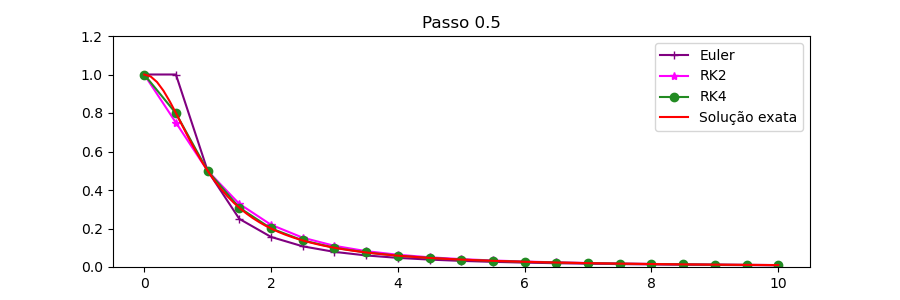

In [7]:
X = np.linspace(0,10,100)
G = np.vectorize(g)

plt.rcParams['figure.figsize'] = (9,3)
plt.ylim(0, 1.2)
plt.plot(t1, x1 ,color = 'purple',  marker="+", label='Euler')
plt.plot(t2, x2 ,color = 'fuchsia',  marker="*",label='RK2')
plt.plot(t3, x3 ,color = 'forestgreen',  marker="o",label='RK4')
plt.plot(X,G(X), color = "red" ,  label = 'Solução exata')
plt.title('Passo 0.5',{'fontsize': 12})
plt.legend()

#### Método de Euler
Buscando uma solução mais exata, com $h=0.3$

In [8]:
t1, x1 = ode_1_ordem(0, 10, 1, 0.3, 1)

<IPython.core.display.Javascript object>


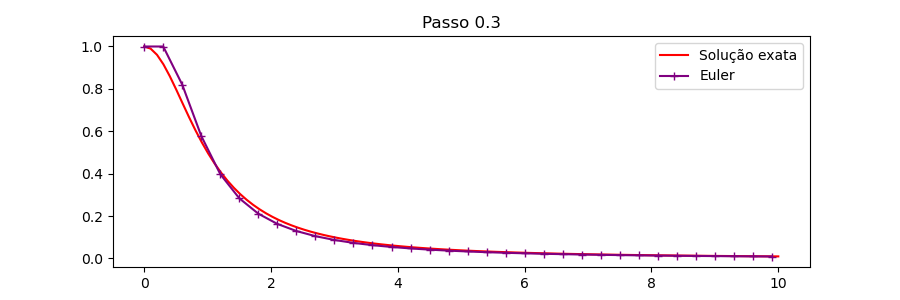

In [9]:
plt.plot(X,G(X), color = "red" ,  label = 'Solução exata')
plt.plot(t1, x1 ,color = 'purple',  marker="+", label='Euler')

plt.title('Passo 0.3',{'fontsize': 12})
plt.legend()

Diminuindo ainda mais o passo para $h=0.1$

In [10]:
t1, x1 = ode_1_ordem(0, 10, 1, 0.1, 1)

<IPython.core.display.Javascript object>


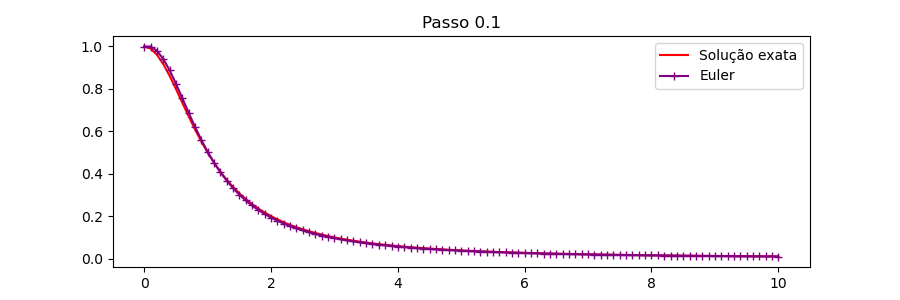

In [11]:
plt.plot(X,G(X), color = "red" ,  label = 'Solução exata')
plt.plot(t1, x1 ,color = 'purple',  marker="+", label='Euler')
plt.title('Passo 0.1',{'fontsize': 12})
plt.legend()

#### Método de Runge-Kutta Segunda Ordem
Buscando uma solução com $h=0.3$

In [12]:
t2, x2 = ode_1_ordem(0, 10, 1, 0.3, 2)

<IPython.core.display.Javascript object>


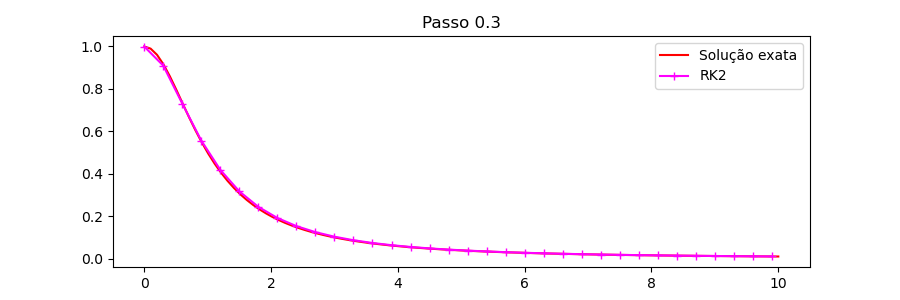

In [13]:
plt.plot(X,G(X), color = "red" ,  label = 'Solução exata')
plt.plot(t2, x2 ,color = 'fuchsia',  marker="+",label='RK2')
plt.title('Passo 0.3',{'fontsize': 12})
plt.legend()

Para $h=0.2$

In [14]:
t2, x2 = ode_1_ordem(0, 10, 1, 0.2, 2)

<IPython.core.display.Javascript object>


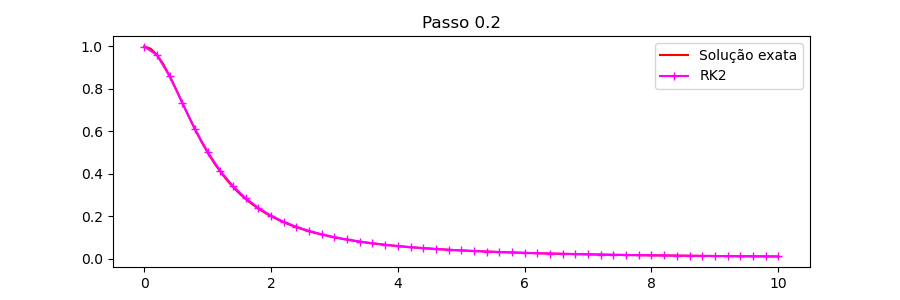

In [15]:
plt.plot(X,G(X), color = "red" ,  label = 'Solução exata')
plt.plot(t2, x2 ,color = 'fuchsia',  marker="+",label='RK2')
plt.title('Passo 0.2',{'fontsize': 12})
plt.legend()

#### Método de Runge-Kutta Quarta Ordem
Buscando uma solução mais exata, com $h=0.4$

In [16]:
t3, x3 = ode_1_ordem(0, 10, 1, 0.4, 3)

<IPython.core.display.Javascript object>


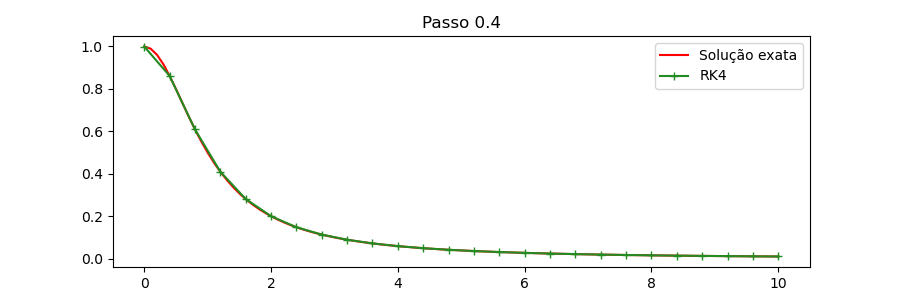

In [17]:
plt.plot(X,G(X), color = "red" ,  label = 'Solução exata')
plt.plot(t3, x3 ,color = 'forestgreen',  marker="+",label='RK4')
plt.title('Passo 0.4' ,{'fontsize': 12})
plt.legend()

Para $h=0.2$

In [18]:
t3, x3 = ode_1_ordem(0, 10, 1, 0.2, 3)

<IPython.core.display.Javascript object>


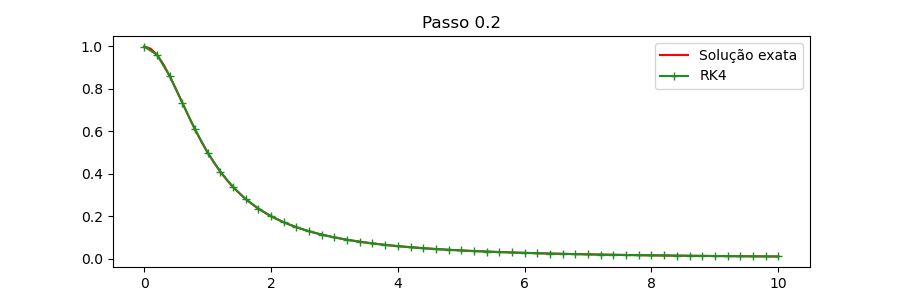

In [19]:
plt.plot(X,G(X), color = "red" ,  label = 'Solução exata')
plt.plot(t3, x3 ,color = 'forestgreen',  marker="+",label='RK4')
plt.title('Passo 0.2' ,{'fontsize': 12})
plt.legend()

Percebemos que já está bem próximo da solução exata, considerando os pontos encontrados no método Runge-Kutta de quarta ordem que coincidem com a solução exata graficamente.

### Tarefa 2) 
Para integrar equações diferenciais de segunda ordem $y''(t)$, elaborei uma rotina computacional com uma variável de entrada $metodo$ que define se o método usado será o da Expansão em Serie de Taylor $(1)$ ou Runge-Kutta-Nystron  $(\neq 1) $

In [20]:
def ode_2_ordem(t0, tf, x0, der_x0, h, metodo):
    N = int((tf - t0)/h)
    X = np.zeros(N+1)
    T = np.zeros(N+1)
    T[0] = t0
    X[0] = x0
    der_X = der_x0
    for k in np.arange(1, N+1):
        T[k] = k*h
        if metodo == 1:
            # Serie de Taylor
            K = f(T[k-1], X[k-1], der_X)
            X[k] = X[k-1] + der_X*h + (K/2)*(h**2)
            der_X += K*h

        else:
            # Runge-Kutta-Nystron:
            K1 = (h/2)*f(T[k-1], X[k-1], der_X)
            Q = (h/2) * (der_X + K1/2)
            K2 = (h/2)*f(T[k-1] + h/2, X[k-1] + Q, der_X + K1)
            K3 = (h/2)*f(T[k-1] + h/2, X[k-1] + Q, der_X + K2)
            L = h*(der_X + K3)
            K4 = (h/2)*f(T[k-1] + h, X[k-1] + L, der_X + 2*K3)

            X[k] = X[k-1] + h*(der_X + (K1+K2+K3)/3)
            der_X += (K1 + 2*K2 + 2*K3 + K4)/3
    return T, X

### Exercício 2)
$$ my''(t) +cy'(t) + ky(t) = F(t)$$

$$F(t) = 2 sin(wt) + sin(2wt) + cos(3wt)$$

$$m=1; c=0.2; k=1; w=0.5$$

$$y'(0)= y(0) = 0$$
$$0\leq t \leq 100$$


Para resolver esta equação diferencial pelos métodos desenvolvidos, é necessario tirar uma expressão para $y ''(t)$

$$y''(t) = \frac{F(t) - cy'(t) -ky(t)}{m}$$

Substituindo os valores dados no problema temos:

$$y''(t) = 2 sin(0.5 t) + sin(t) + cos(1.5 t) - 0.2y'(t) - y(t)$$

Definindo a função $f(t,y,y')$

In [21]:
def f(t,x,der_x):
    return 2*np.sin(0.5*t)+np.sin(t)+np.cos(1.5*t)-0.2*der_x - x

Utilizando um passo de $h=0.3$

In [22]:
t1, x1 = ode_2_ordem(0, 100, 0, 0, 0.3, 1)
t2, x2 = ode_2_ordem(0, 100, 0, 0, 0.3, 2)

In [23]:
N = np.size(t1)
print(" t[N]     taylor        rkn   \n")
for i in np.arange(N):
    if (i<=6) or (i>=(N-8)):
        tempo = t1[i]
        aux = x1[i]
        aux1 = x2[i]
        print(' {:>2.1f} '.format(t1[i]), '  {:>8,.5f}  '.format(aux), '  {:>8,.5f}  '.format(aux1))
    if (i==7):
        print(' ...     .......       .......')

 t[N]     taylor        rkn   

 0.0     0.00000      0.00000  
 0.3     0.04500      0.05188  
 0.6     0.19754      0.22444  
 0.9     0.47727      0.52028  
 1.2     0.87407      0.91512  
 1.5     1.35304      1.36615  
 1.8     1.86356      1.82268  
 ...     .......       .......
 97.8    13.56599      2.53254  
 98.1    10.71436      1.96132  
 98.4     6.65603      0.96021  
 98.7     1.74461     -0.37529  
 99.0    -3.56834     -1.89936  
 99.3    -8.77400     -3.43220  
 99.6    -13.35575     -4.78210  
 99.9    -16.84208     -5.77033  


Plotando o gráfico com os valores encontrados:

<IPython.core.display.Javascript object>


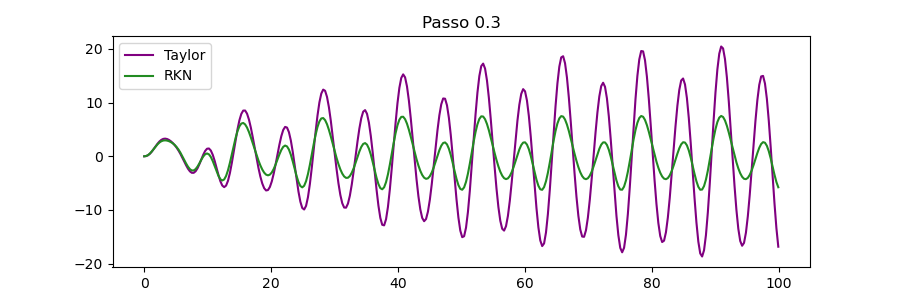

In [24]:
plt.plot(t1,x1, color = "purple" ,  label = 'Taylor')
plt.plot(t2, x2 ,color = 'forestgreen',label='RKN')
plt.title('Passo 0.3' ,{'fontsize': 12})
plt.legend()

Comparando o Método de Runge-Kutta-Nystron com passos $h=0.2$ e $h=0.3$

In [25]:
t1, x1 = ode_2_ordem(0, 100, 0, 0, 0.2, 2)
t2, x2 = ode_2_ordem(0, 100, 0, 0, 0.3, 2)

<IPython.core.display.Javascript object>


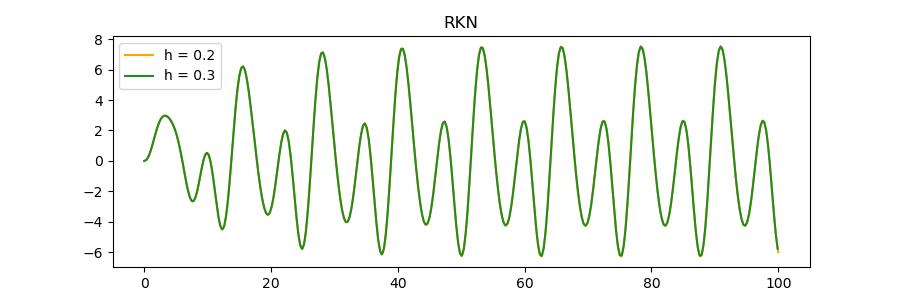

In [26]:
plt.plot(t1,x1, color = "orange" ,  label = 'h = 0.2')
plt.plot(t2, x2 ,color = 'forestgreen',label='h = 0.3')
plt.title('RKN' ,{'fontsize': 12})
plt.legend()

Podemos perceber pelo gráfico que a mudança para o passo $h=0.2$ está praticamente coincidente com o passo $h=0.3$ para o Método de Runge-Kutta-Nystron. 

Comparando agora a Expansão em Série de Taylor com passos $h=0.2$ e $h=0.3$

In [27]:
t1, x1 = ode_2_ordem(0, 100, 0, 0, 0.2, 1)
t2, x2 = ode_2_ordem(0, 100, 0, 0, 0.3, 1)

<IPython.core.display.Javascript object>


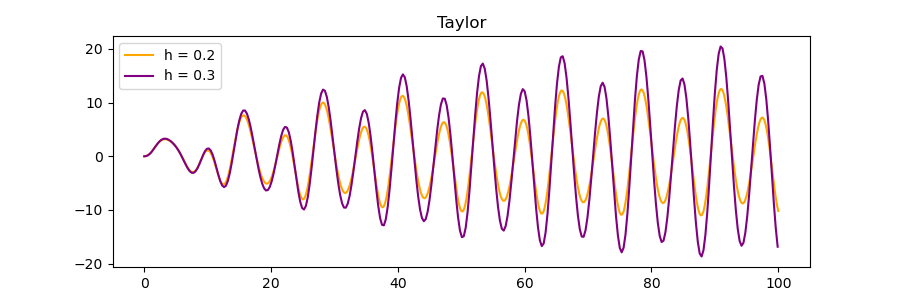

In [28]:
plt.plot(t1,x1, color = "orange" ,  label = 'h = 0.2')
plt.plot(t2, x2 ,color = 'purple',label='h = 0.3')
plt.title('Taylor' ,{'fontsize': 12})
plt.legend()

Podemos perceber pelo gráfico que a mudança de passo altera radicalmente os valores encontrados, além disso, ao diminuir o passo, os valores de picos da função diminuem, se assemelhando um pouco aos valores de Runge-Kutta-Nystron. Sendo assim, testando a diferença entre os passos $h=0.1$ e $h=0.2$ ainda na Expansão de Taylor:

In [31]:
t1, x1 = ode_2_ordem(0, 100, 0, 0, 0.1, 1)
t2, x2 = ode_2_ordem(0, 100, 0, 0, 0.2, 1)

<IPython.core.display.Javascript object>


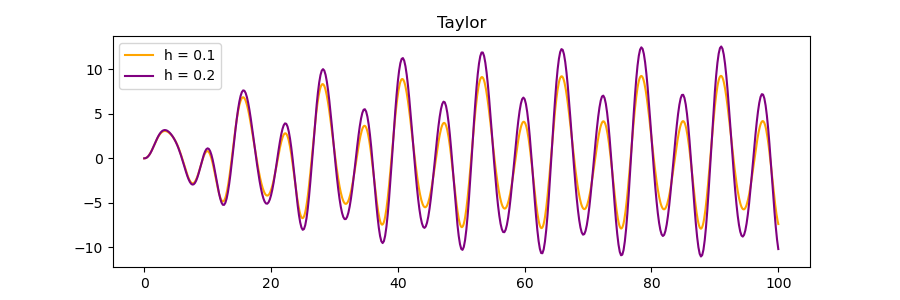

In [32]:
plt.plot(t1,x1, color = "orange" ,  label = 'h = 0.1')
plt.plot(t2, x2 ,color = 'purple',label='h = 0.2')
plt.title('Taylor' ,{'fontsize': 12})
plt.legend()

Como o resultado ainda não convergiu, testando novamente para uma diferença de passos ainda menor, ou seja: $h=0.01$ e $h=0.05$

In [62]:
t1, x1 = ode_2_ordem(0, 100, 0, 0, 0.01, 1)
t2, x2 = ode_2_ordem(0, 100, 0, 0, 0.05, 1)

<IPython.core.display.Javascript object>


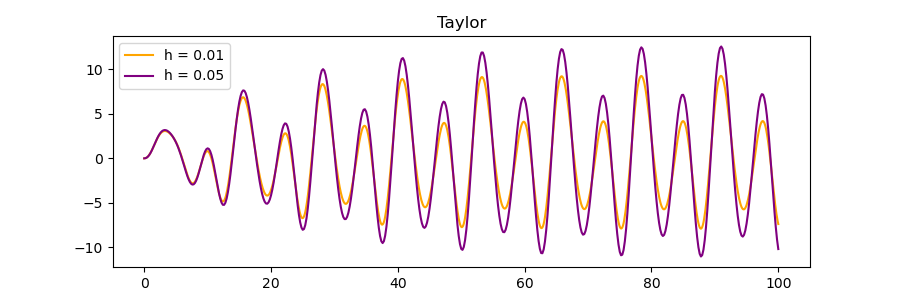

In [33]:
plt.plot(t1,x1, color = "orange" ,  label = 'h = 0.01')
plt.plot(t2, x2 ,color = 'purple',label='h = 0.05')
plt.title('Taylor' ,{'fontsize': 12})
plt.legend()

A partir daqui, vou plotar o gráfico de Runge-Kutta-Nystron com $h=0.2$, junto com a Expansão em Taylor com $h=0.01$ na busca de convergir os dois métodos. 

In [34]:
t1, x1 = ode_2_ordem(0, 100, 0, 0, 0.01, 1)
t2, x2 = ode_2_ordem(0, 100, 0, 0, 0.2, 2)

<IPython.core.display.Javascript object>


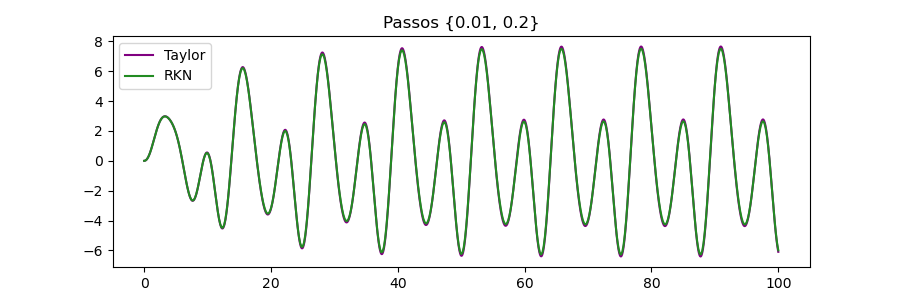

In [35]:
plt.plot(t1,x1, color = "purple" ,  label = 'Taylor')
plt.plot(t2, x2 ,color = 'forestgreen',label='RKN')
plt.title('Passos {0.01, 0.2}' ,{'fontsize': 12})
plt.legend()

Como nos picos do gráfico, a os métodos ainda não estão coincidentes, testar $h=0.1$ para o Método Runge-Kutta-Nystron e $h=0.005$ para a Expansão em série de Taylor.

In [39]:
t1, x1 = ode_2_ordem(0, 100, 0, 0, 0.005, 1)
t2, x2 = ode_2_ordem(0, 100, 0, 0, 0.1, 2)

In [40]:
plt.plot(t1,x1, color = "purple" ,  label = 'Taylor')
plt.plot(t2, x2 ,color = 'forestgreen',label='RKN')
plt.title('Passos {0.005, 0.1}' ,{'fontsize': 12})
plt.legend()

<IPython.core.display.Javascript object>

Percebemos, portanto, que ambas soluções ficam muito parecidas, para os valores de $h=0.005$ na Expansão em série de Taylor e para o valor de $h=0.1$ no caso do Método de Runge-Kutta-Nystron, como podemos verificar pelos valores encontrados em ambos os métodos.

In [41]:
N = np.size(t2)
print(" t[N]     taylor        rkn   \n")
for i in np.arange(N):
    if (i<=6) or (i>=(N-8)):
        tempo = t2[i]
        aux = x1[i*20]
        aux1 = x2[i]
        print(' {:>2.1f} '.format(t2[i]), '  {:>8,.5f}  '.format(aux), '  {:>8,.5f}  '.format(aux1))
    if (i==7):
        print(' ...     .......       .......')

 t[N]     taylor        rkn   

 0.0     0.00000      0.00000  
 0.1     0.00526      0.00528  
 0.2     0.02208      0.02215  
 0.3     0.05169      0.05184  
 0.4     0.09495      0.09520  
 0.5     0.15235      0.15269  
 0.6     0.22396      0.22439  
 ...     .......       .......
 99.3    -3.44882     -3.43339  
 99.4    -3.93451     -3.91307  
 99.5    -4.39260     -4.36532  
 99.6    -4.81632     -4.78342  
 99.7    -5.19925     -5.16101  
 99.8    -5.53544     -5.49220  
 99.9    -5.81948     -5.77165  
 100.0    -6.04664     -5.99466  


### Exercício 3)
Resolver a equação diferencial apresentada em sala de aula, que representa um corpo em queda livre na água:

$$z''(t)= -g- k_D z'(t) |z'(t)| $$

Assumindo-se: $z'(t)=0$ , $z(t)=0$ e $k_D =1$

Substituindo os valores e utilizando o valor da aceleração da gravidade $g=9,80665$, temos:

$$z''(t)= -9,80665 - z'(t) |z'(t)| $$

Definindo a função $f(t,z,z')$

In [42]:
def f(t,x,der_x):
    return  -9.80665 - der_x*abs(der_x)

Utilizando os métodos de Taylor e Runge-Kutta-Nystron para encontrar a solução, inicialmente com $h=0.3$

In [43]:
t1, x1 = ode_2_ordem(0, 20, 0, 0, 0.3, 1)
t2, x2 = ode_2_ordem(0, 20, 0, 0, 0.3, 2)

<IPython.core.display.Javascript object>


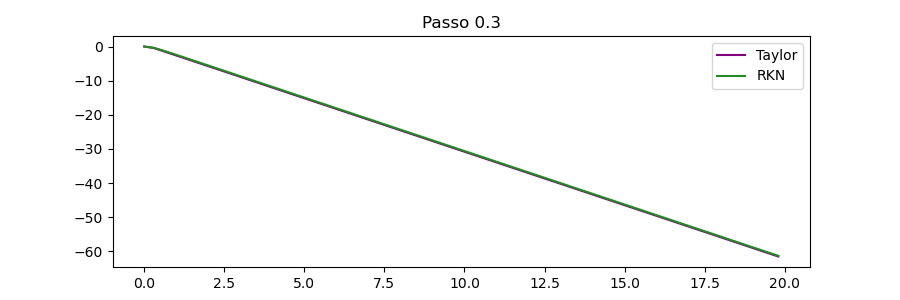

In [44]:
plt.plot(t1,x1, color = "purple" ,  label = 'Taylor')
plt.plot(t2, x2 ,color = 'forestgreen',label='RKN')
plt.title('Passo 0.3' ,{'fontsize': 12})
plt.legend()

Podemos perceber que ambas soluções já convergem para um valor muito semelhante graficamente com $h=0.3$. Resultados obtidos para plotar esse gráfico foram:

In [46]:
N = np.size(t1)
print(" t[N]     taylor        rkn   \n")
for i in np.arange(N):
    if (i<=6) or (i>=(N-8)):
        tempo = t2[i]
        aux = x1[i]
        aux1 = x2[i]
        print(' {:>2.1f} '.format(t2[i]), '  {:>8,.5f}  '.format(aux), '  {:>8,.5f}  '.format(aux1))
    if (i==7):
        print(' ...     .......       .......')

 t[N]     taylor        rkn   

 0.0     0.00000      0.00000  
 0.3    -0.44130     -0.38913  
 0.6    -1.37571     -1.21412  
 0.9    -2.31691     -2.12514  
 1.2    -3.25282     -3.05647  
 1.5    -4.19382     -3.99353  
 1.8    -5.13074     -4.93228  
 ...     .......       .......
 17.7    -54.92152     -54.72373  
 18.0    -55.86099     -55.66319  
 18.3    -56.80045     -56.60266  
 18.6    -57.73992     -57.54213  
 18.9    -58.67939     -58.48160  
 19.2    -59.61885     -59.42106  
 19.5    -60.55832     -60.36053  
 19.8    -61.49779     -61.30000  
